In [12]:
import os
import re
import janome
from janome.tokenizer import Tokenizer
import glob

from gensim.models import word2vec

In [3]:
os.chdir("aozora\kaji_motojiro")

file = open('lemon.txt', 'r')
string = file.read()

In [4]:
file = open('lemon.txt', 'r')
text = file.read()

def clean_text(text):
    text = text.replace("｜","")
    text = text.replace('\u3000','')
    text = re.sub("《.+?》","",text)
    text = re.sub("［.+?］","",text)
    text = text.replace('―','')
    text = text.replace('\n\n', '\n')
    text = text.replace('\r', '')
    # print(text[:100])
    return text

In [5]:
text = clean_text(text)

In [6]:
t = Tokenizer()
tokens = t.tokenize(text)


for token in tokens[:10]:
    print(token)
file.close()

えたい	名詞,一般,*,*,*,*,えたい,エタイ,エタイ
の	助詞,格助詞,一般,*,*,*,の,ノ,ノ
知れ	動詞,自立,*,*,一段,未然形,知れる,シレ,シレ
ない	助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
不吉	名詞,形容動詞語幹,*,*,*,*,不吉,フキツ,フキツ
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
塊	名詞,一般,*,*,*,*,塊,カタマリ,カタマリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
の	助詞,連体化,*,*,*,*,の,ノ,ノ


In [7]:
type(tokens)

list

In [8]:
books = glob.glob('*.txt')

books_tokens = []
for book in books:
    file = open(book, 'r')
    text = file.read()
    text = clean_text(text)
    tokens = t.tokenize(text)
    books_tokens.append(tokens)
    file.close()
len(books_tokens)

28

In [9]:
for book in books:
    file = open(book, 'r')
    text = file.read()
    text = clean_text(text)
    text
    file.close()

In [10]:
os.chdir("aozora\kaji_motojiro")

file = open('lemon.txt', 'r')
string = file.read()

C:\Users\fumiaki\Anaconda3\envs\tf_conda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
def extract_words(text):
    tokens = t.tokenize(text)
    return [token.base_form for token in tokens
        if token.part_of_speech.split(',')[0] in['名詞', '動詞']]

sentences = text.split('。')

word_list =  [extract_words(s) for s in sentences]

In [17]:
words_list = []
for book in books:
    file = open(book, 'r')
    text = file.read()
    file.close()
    sentences = text.split('。')
    temp = [extract_words(s) for s in sentences]
    words_list += temp

In [18]:
words_list[:10]

[['猫', '耳', 'もの', '笑', 'おく', 'しな', 'もの'],
 ['く', '竹の子', '皮', 'よう', '表', '絨毛', 'じゅう', '生える', 'いる', '裏', 'する', 'いる'],
 ['かた', 'いる', 'よう', 'いえる', '一種', '特別', '物質'],
 ['私',
  '子供',
  'とき',
  '猫',
  '耳',
  'いう',
  '切符',
  '切り',
  'ン',
  'やる',
  'みる',
  '堪る',
  'たま',
  'ら'],
 ['これ', '残酷', '空想'],
 ['猫', '耳', '持つ', 'いる', '一種', '不可思議', '示唆', 'する', 'さ', '力', 'の'],
 ['私',
  '家',
  '来る',
  '謹厳',
  '客',
  '膝',
  'あがる',
  '来る',
  '仔猫',
  '耳',
  '話',
  'する',
  '抓る',
  'つね',
  'いる',
  '光景',
  '忘れる',
  'こと',
  'できる'],
 ['よう', '疑惑', '思いの外', 'もの'],
 ['切符',
  '切り',
  'ン',
  'やる',
  'よう',
  '児戯',
  '類する',
  '空想',
  '思い切る',
  '行為',
  '移す',
  '限り',
  'われわれ',
  'アンニュイ',
  'なか',
  '外観',
  '上',
  '年齢',
  '遙',
  'はる',
  'かに',
  '生き延びる'],
 ['分別',
  'できる',
  '大人',
  '今',
  '熱心',
  '厚紙',
  'サンドウィッチ',
  'よう',
  '挾む',
  'うえ',
  '一',
  '思い',
  '切る',
  'みる',
  'こと',
  '考える',
  'いる',
  'の',
  '最近',
  'こと',
  '空想',
  '致命',
  '的',
  '誤算',
  '曝露',
  'ばく',
  'ろ',
  'する',
  'しまう']]

In [19]:
model = word2vec.Word2Vec(words_list, size=100, min_count=5, window=5, iter=100)

In [20]:
ret=model.wv.most_similar(positive=['昼'],negative=['夜'])

for item in ret:
    print(item[0], item[1])

入る 0.4244275391101837
障子 0.4041593670845032
若い衆 0.38970285654067993
しま 0.3644280433654785
重 0.36401352286338806
済む 0.35953351855278015
がた 0.35944435000419617
鳥 0.35902929306030273
埃 0.35742026567459106
屋 0.3412904739379883


In [21]:
import matplotlib.pyplot as plt

(array([4.081e+03, 7.160e+02, 7.500e+01, 9.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0. ,  15.8,  31.6,  47.4,  63.2,  79. ,  94.8, 110.6, 126.4,
        142.2, 158. ]),
 <a list of 10 Patch objects>)

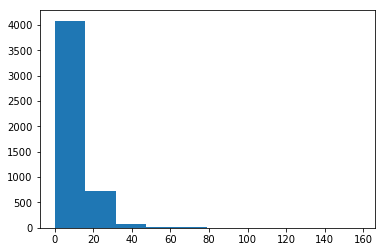

In [22]:
plt.hist([len(ws) for  ws in words_list] )